### 경영데이터마이닝 Term Project

1. Data
- KPMG Customer Demography Cleaned Dataset

2. Business Problem
- 자전거 및 자전거 관련 물품을 판매하는 “Sprocket”사의 고객들을 특성에 맞는 고객군으로 분류한 후 타겟 마케팅 실시

3. Data Mining
- "Sprocket"사의 기존 고객들을 데이터에 기반하여 customer segmentation 실시

4. Method
- 비지도학습 기반의 k-means clustering

In [4]:
# 필요한 library import

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import OneHotEncoder
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score

In [5]:
# data load

df = pd.read_csv('/Users/ldw/Documents/경영데이터마이닝/term_project/KPMG_Customer_Demography.csv') 
df

,customer_id,First_Name,Last_Name,gender,DOB,AGE,past_3_years_bike_related_purchases,job_industry_category,wealth_segment,deceased_indicator,tenure,Owns_Car,Address,Postcode,State,Country,property_valuation
0,1,Laraine,Medendorp,Female,10/12/1953,69,93,Health,Mass Customer,N,11,Yes,060 Morning Avenue,2016,New South Wales,Australia,10
1,2,Eli,Bockman,Male,12/16/1980,42,81,Financial Services,Mass Customer,N,16,Yes,6 Meadow Vale Court,2153,New South Wales,Australia,10
2,4,Talbot,NaN,Male,10/3/1961,61,33,IT,Mass Customer,N,7,No,0 Holy Cross Court,4211,Queensland,Australia,9
3,5,Sheila-kathryn,Calton,Female,5/13/1977,45,56,NaN,Affluent Customer,N,8,Yes,17979 Del Mar Point,2448,New South Wales,Australia,4
4,6,Curr,Duckhouse,Male,9/16/1966,56,35,Retail,High Net Worth,N,13,Yes,9 Oakridge Court,3216,Victoria,Australia,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3903,3995,Rusty,Iapico,Male,12/12/1975,47,93,Manufacturing,Mass Customer,N,14,Yes,613 Erie Lane,2088,New South Wales,Australia,12
3904,3996,Rosalia,Halgarth,Female,8/9/1975,47,8,Health,Mass Customer,N,19,No,0 Transport Center,3977,Victoria,Australia,6
3905,3997,Blanch,Nisuis,Female,7/13/2001,21,87,Manufacturing,High Net Worth,N,1,Yes,4 Dovetail Crossing,2350,New South Wales,Australia,2
3906,3999,Patrizius,NaN,Male,10/24/1973,49,11,Manufacturing,Affluent Customer,N,10,Yes,1482 Hauk Trail,3064,Victoria,Australia,3


In [6]:
# index를 재설정

df.index = range(1, 3909)
df

,customer_id,First_Name,Last_Name,gender,DOB,AGE,past_3_years_bike_related_purchases,job_industry_category,wealth_segment,deceased_indicator,tenure,Owns_Car,Address,Postcode,State,Country,property_valuation
1,1,Laraine,Medendorp,Female,10/12/1953,69,93,Health,Mass Customer,N,11,Yes,060 Morning Avenue,2016,New South Wales,Australia,10
2,2,Eli,Bockman,Male,12/16/1980,42,81,Financial Services,Mass Customer,N,16,Yes,6 Meadow Vale Court,2153,New South Wales,Australia,10
3,4,Talbot,NaN,Male,10/3/1961,61,33,IT,Mass Customer,N,7,No,0 Holy Cross Court,4211,Queensland,Australia,9
4,5,Sheila-kathryn,Calton,Female,5/13/1977,45,56,NaN,Affluent Customer,N,8,Yes,17979 Del Mar Point,2448,New South Wales,Australia,4
5,6,Curr,Duckhouse,Male,9/16/1966,56,35,Retail,High Net Worth,N,13,Yes,9 Oakridge Court,3216,Victoria,Australia,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3904,3995,Rusty,Iapico,Male,12/12/1975,47,93,Manufacturing,Mass Customer,N,14,Yes,613 Erie Lane,2088,New South Wales,Australia,12
3905,3996,Rosalia,Halgarth,Female,8/9/1975,47,8,Health,Mass Customer,N,19,No,0 Transport Center,3977,Victoria,Australia,6
3906,3997,Blanch,Nisuis,Female,7/13/2001,21,87,Manufacturing,High Net Worth,N,1,Yes,4 Dovetail Crossing,2350,New South Wales,Australia,2
3907,3999,Patrizius,NaN,Male,10/24/1973,49,11,Manufacturing,Affluent Customer,N,10,Yes,1482 Hauk Trail,3064,Victoria,Australia,3


In [7]:
# 불필요한 column 삭제

df.drop(columns=['customer_id', 'First_Name', 'Last_Name', 'DOB', 'deceased_indicator', 'tenure', 'Address', 'Postcode', 'Country', 'property_valuation'], axis=0, inplace=True)
df

,gender,AGE,past_3_years_bike_related_purchases,job_industry_category,wealth_segment,Owns_Car,State
1,Female,69,93,Health,Mass Customer,Yes,New South Wales
2,Male,42,81,Financial Services,Mass Customer,Yes,New South Wales
3,Male,61,33,IT,Mass Customer,No,Queensland
4,Female,45,56,NaN,Affluent Customer,Yes,New South Wales
5,Male,56,35,Retail,High Net Worth,Yes,Victoria
...,...,...,...,...,...,...,...
3904,Male,47,93,Manufacturing,Mass Customer,Yes,New South Wales
3905,Female,47,8,Health,Mass Customer,No,Victoria
3906,Female,21,87,Manufacturing,High Net Worth,Yes,New South Wales
3907,Male,49,11,Manufacturing,Affluent Customer,Yes,Victoria


In [8]:
# 각 feature의 null 값 확인 

df.isnull().sum()

gender                                   0
AGE                                      0
past_3_years_bike_related_purchases      0
job_industry_category                  655
wealth_segment                           0
Owns_Car                                 0
State                                    0
dtype: int64

In [9]:
# null값이 655개인 job_industry_category column 삭제

df.drop(columns='job_industry_category', axis=0, inplace=True)
df

,gender,AGE,past_3_years_bike_related_purchases,wealth_segment,Owns_Car,State
1,Female,69,93,Mass Customer,Yes,New South Wales
2,Male,42,81,Mass Customer,Yes,New South Wales
3,Male,61,33,Mass Customer,No,Queensland
4,Female,45,56,Affluent Customer,Yes,New South Wales
5,Male,56,35,High Net Worth,Yes,Victoria
...,...,...,...,...,...,...
3904,Male,47,93,Mass Customer,Yes,New South Wales
3905,Female,47,8,Mass Customer,No,Victoria
3906,Female,21,87,High Net Worth,Yes,New South Wales
3907,Male,49,11,Affluent Customer,Yes,Victoria


In [10]:
# 범주형 데이터를 수치형 데이터로 one-hot encoding

ohe = OneHotEncoder(sparse=False)
encoded_features = ohe.fit_transform(np.array(df[['gender', 'wealth_segment', 'Owns_Car', 'State']]))
encoded_features

array([[1., 0., 0., ..., 1., 0., 0.],
       [0., 1., 0., ..., 1., 0., 0.],
       [0., 1., 0., ..., 0., 1., 0.],
       ...,
       [1., 0., 0., ..., 1., 0., 0.],
       [0., 1., 1., ..., 0., 0., 1.],
       [0., 1., 1., ..., 0., 1., 0.]])

In [11]:
encoded_features.shape

(3908, 10)

In [12]:
# one-hot encoding된 column 삭제

df_numerical = df.drop(columns=['gender', 'wealth_segment', 'Owns_Car', 'State'], axis=0)
df_numerical

,AGE,past_3_years_bike_related_purchases
1,69,93
2,42,81
3,61,33
4,45,56
5,56,35
...,...,...
3904,47,93
3905,47,8
3906,21,87
3907,49,11


In [13]:
# 수치형 feature를 0 ~ 1의 범위로 정규화

scaler = MinMaxScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df_numerical), columns=['AGE', 'past_3_years_bike_related_purchases'])
df_scaled

# df_scaled[:, 'past_3_years_bike_related_purchases'] = df_scaled[:, 'past_3_years_bike_related_purchases'] + 10 
# -> 가중치 부여

,AGE,past_3_years_bike_related_purchases
0,0.690141,0.939394
1,0.309859,0.818182
2,0.577465,0.333333
3,0.352113,0.565657
4,0.507042,0.353535
...,...,...
3903,0.380282,0.939394
3904,0.380282,0.080808
3905,0.014085,0.878788
3906,0.408451,0.111111


In [14]:
# one-hot encoding으로 수치화시킨 feature와 기존의 수치형 feature를 포함한 전체 feature 데이터 생성

features = np.hstack((df_scaled, np.array(encoded_features)))
features

array([[0.69014085, 0.93939394, 1.        , ..., 1.        , 0.        ,
        0.        ],
       [0.30985915, 0.81818182, 0.        , ..., 1.        , 0.        ,
        0.        ],
       [0.57746479, 0.33333333, 0.        , ..., 0.        , 1.        ,
        0.        ],
       ...,
       [0.01408451, 0.87878788, 1.        , ..., 1.        , 0.        ,
        0.        ],
       [0.4084507 , 0.11111111, 0.        , ..., 0.        , 0.        ,
        1.        ],
       [0.15492958, 0.76767677, 0.        , ..., 0.        , 1.        ,
        0.        ]])

In [15]:
# 12차원의 feature를 2차원으로 차원 축소 (PCA)

pca = PCA(n_components=2)
features_pca = pca.fit_transform(features)
features_pca

array([[ 0.1473412 , -1.00107735],
       [ 0.93769407,  0.16269447],
       [-0.25377708,  1.03171401],
       ...,
       [ 0.27704108, -0.97457246],
       [ 1.03310509,  0.27622447],
       [-0.10217247,  1.07656083]])

In [16]:
# 군집 타당성 지표 중 하나인 실루엣 지표를 통해 최적의 군집 개수 결정
score_ls = []
for i in range(2, 10): 
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(features_pca)
    cluster = kmeans.predict(features_pca)
    score = silhouette_score(features_pca, cluster)
    score_ls.append(score)
    print("n_cluster=%d 일 때의 실루엣 지표: %.10f" % (i, score))

n_cluster=2 일 때의 실루엣 지표: 0.5541779180
n_cluster=3 일 때의 실루엣 지표: 0.7030300833
n_cluster=4 일 때의 실루엣 지표: 0.9225075407
n_cluster=5 일 때의 실루엣 지표: 0.8513327669
n_cluster=6 일 때의 실루엣 지표: 0.7813346874
n_cluster=7 일 때의 실루엣 지표: 0.7156339439
n_cluster=8 일 때의 실루엣 지표: 0.6509682073
n_cluster=9 일 때의 실루엣 지표: 0.6780053309


<function matplotlib.pyplot.show(close=None, block=None)>

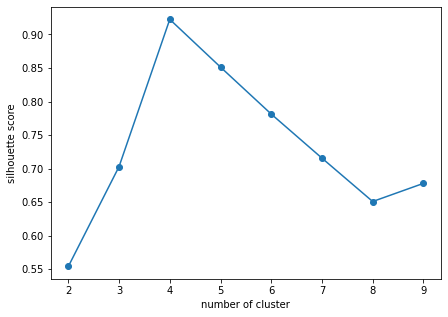

In [17]:
# 각 군집 개수에 대한 실루엣 지표 시각화

plt.figure(figsize=(7,5))
plt.plot(range(2, 10), score_ls, '-o')
plt.xlabel('number of cluster')
plt.ylabel('silhouette score')
plt.show

In [18]:
# 4개의 군집으로 k_means 군집화

kmeans = KMeans(n_clusters=4)
kmeans.fit(features_pca)
cluster = kmeans.predict(features_pca)
cluster

array([0, 3, 1, ..., 0, 3, 1], dtype=int32)

In [19]:
# 4개의 군집으로 군집화 했을 경우의 실루엣 지표

score = silhouette_score(features_pca, cluster)
print("최적의 군집 개수에 대한 실루엣 지표: ", score)

최적의 군집 개수에 대한 실루엣 지표:  0.9225075407270733


In [20]:
# 2차원으로 차원 축소된 feature와 군집 결과인 cluster를 column으로 갖는 dataframe 생성

df_pca = pd.DataFrame(features_pca, columns=['pca_x', 'pca_y'])
df_pca['cluster'] = cluster
df_pca

,pca_x,pca_y,cluster
0,0.147341,-1.001077,0
1,0.937694,0.162694,3
2,-0.253777,1.031714,1
3,0.297081,-0.968333,0
4,1.013013,0.267847,3
...,...,...,...
3903,0.937995,0.164301,3
3904,-1.068207,-0.130962,2
3905,0.277041,-0.974572,0
3906,1.033105,0.276224,3


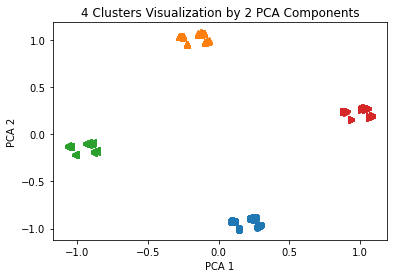

In [21]:
# kmeans 군집화 결과 시각화

# 각 cluster 값인 경우마다 Index 추출
marker0_ind = df_pca[df_pca['cluster']==0].index
marker1_ind = df_pca[df_pca['cluster']==1].index
marker2_ind = df_pca[df_pca['cluster']==2].index
marker3_ind = df_pca[df_pca['cluster']==3].index

# 각 cluster에 해당하는 Index로 pca_x, pca_y 값 추출
plt.scatter(x=df_pca.loc[marker0_ind,'pca_x'], y=df_pca.loc[marker0_ind,'pca_y'], marker='o') 
plt.scatter(x=df_pca.loc[marker1_ind,'pca_x'], y=df_pca.loc[marker1_ind,'pca_y'], marker='^') 
plt.scatter(x=df_pca.loc[marker2_ind,'pca_x'], y=df_pca.loc[marker2_ind,'pca_y'], marker='<') 
plt.scatter(x=df_pca.loc[marker3_ind,'pca_x'], y=df_pca.loc[marker3_ind,'pca_y'], marker='>') 

plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.title('4 Clusters Visualization by 2 PCA Components')
plt.show()

In [22]:
# cluster column 추가

df['cluster'] = cluster
df

,gender,AGE,past_3_years_bike_related_purchases,wealth_segment,Owns_Car,State,cluster
1,Female,69,93,Mass Customer,Yes,New South Wales,0
2,Male,42,81,Mass Customer,Yes,New South Wales,3
3,Male,61,33,Mass Customer,No,Queensland,1
4,Female,45,56,Affluent Customer,Yes,New South Wales,0
5,Male,56,35,High Net Worth,Yes,Victoria,3
...,...,...,...,...,...,...,...
3904,Male,47,93,Mass Customer,Yes,New South Wales,3
3905,Female,47,8,Mass Customer,No,Victoria,2
3906,Female,21,87,High Net Worth,Yes,New South Wales,0
3907,Male,49,11,Affluent Customer,Yes,Victoria,3


In [33]:
df['cluster'].unique()


array([0, 3, 1, 2], dtype=int32)

In [23]:
# 각 군집별 고객 탐색

from tabulate import tabulate

for i in df['cluster'].unique():
    df_cluster = pd.DataFrame(df[df['cluster'] == i].describe(include='all').loc[['unique', 'mean', 'min', 'max', 'top', 'std']])
    print(tabulate(df_cluster, headers='keys', tablefmt='psql'))

+--------+----------+----------+---------------------------------------+------------------+------------+-----------------+-----------+
|        | gender   |      AGE |   past_3_years_bike_related_purchases | wealth_segment   | Owns_Car   | State           |   cluster |
|--------+----------+----------+---------------------------------------+------------------+------------+-----------------+-----------|
| unique | 1        | nan      |                              nan      | 3                | 1          | 3               |       nan |
| mean   | nan      |  44.8938 |                               48.1462 | nan              | nan        | nan             |         0 |
| min    | nan      |  20      |                                0      | nan              | nan        | nan             |         0 |
| max    | nan      |  69      |                               99      | nan              | nan        | nan             |         0 |
| top    | Female   | nan      |                       

In [24]:
# 각 군집별 gender, state, wealth_segment 특성 분포 

for col in df[['gender', 'State', 'wealth_segment']]:
    group = df.groupby([col, 'cluster'])
    df_group = pd.DataFrame(group.size())
    print(tabulate(df_group, headers='keys', tablefmt='psql'))

+---------------+------+
|               |    0 |
|---------------+------|
| ('Female', 0) | 1026 |
| ('Female', 2) | 1011 |
| ('Male', 1)   |  926 |
| ('Male', 3)   |  945 |
+---------------+------+
+------------------------+-----+
|                        |   0 |
|------------------------+-----|
| ('New South Wales', 0) | 561 |
| ('New South Wales', 1) | 478 |
| ('New South Wales', 2) | 539 |
| ('New South Wales', 3) | 511 |
| ('Queensland', 0)      | 209 |
| ('Queensland', 1)      | 202 |
| ('Queensland', 2)      | 209 |
| ('Queensland', 3)      | 201 |
| ('Victoria', 0)        | 256 |
| ('Victoria', 1)        | 246 |
| ('Victoria', 2)        | 263 |
| ('Victoria', 3)        | 233 |
+------------------------+-----+
+--------------------------+-----+
|                          |   0 |
|--------------------------+-----|
| ('Affluent Customer', 0) | 249 |
| ('Affluent Customer', 1) | 229 |
| ('Affluent Customer', 2) | 232 |
| ('Affluent Customer', 3) | 252 |
| ('High Net Worth', 0)    